## Please enter your team name

In [1]:
team_name = input("Please enter your team name: ")

Please enter your team name: Didi


 


# Can you predict the movies success ?
![](https://media.giphy.com/media/3ohhwDMC187JqL69DG/giphy.gif)

In this tutorial we will go through some basic steps of machine learning model creation, to get familiar with this topic on a real life dataset.


At the end of this tutorial you will discover:

1- How to explore and manipulate a dataset?

2- How to work with famous machine learning libraries like Scikit-learn?

3- How does feature engineering process work?

4- How to model a real life problem by Machine Learning algorithm?


Keep in mind that **YOUR** results will help to improve marketing efforts in the film industry and predicting if the film is going to show ducks or miracle in the cinema after release.



## The Movies Dataset

The dataset comes from the IMDB API, it consists of 26 million ratings on around 45,000 movies from 27,000 users.
The aim is to be able to create a regression model that predict the average rate of each movie. The exact number of rows are 45466 with 20 columns that are divided in two parts.


###  The features are
* **belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage:** The Official Homepage of the move.
* **id:** The ID of the move.
* **original_language:** The language in which the movie was originally shot in.
* **original_title:** The original title of the movie.
* **overview:** A brief blurb of the movie.
* **popularity:** The Popularity Score assigned by IMDB.
* **production_companies:** A stringified list of production companies involved with the making of the movie.
* **production_countries:** A stringified list of countries where the movie was shot/produced in.
* **revenue:** The total revenue of the movie in dollars.
* **spoken_languages:** A stringified list of spoken languages in the film.
* **title:** The Official Title of the movie.
* **vote_average:** The average rating of the movie.
* **vote_count:** The number of votes by users, as counted by IMDB.



## Machine learning pipeline

![title](img/pipeLineML2.png)

**1. Steps to create a machine learning pipeline:**
* Data preparation:
  * Data Cleaning
    * Irrelevant data
    * Duplicated rows
    * Missing values
    
  * Feature Engineering
    * Create new features
    * Convert features to appropriate format
* Training the model
  * Choosing a model
  * Tune it's parameters 
* Predicting
  * Predict on unseen data
  
**2. Regression Models:** Predict a numerical value given a set of features
![title](img/Reg.jpg)

## A good fitting tradeoff

![title](img/biais.png)

## Use a validation set to avoid over/underfitting 

![title](img/train-test-split.png)

### **Note:** If you have to pre-process data don't forget to do it for all the partitions Train, Validation and Test.

## Decision trees

**Consider you need a loan. How will the bank know if you'll pay it back or not? The bank has lots of profiles of people who took money before. They have data about age, education, occupation and salary and – most importantly – the fact of paying the money back Or not. Using this data, we can teach the machine to find the patterns and get the answer.**

![input](img/loan.png)


## From trees to forest

![title](img/RForest.png)

RF consists of a large number of individual randomized decision trees.

Now we are going to predict the average rate for each film by means of RF.


# Let's start

In [2]:
#Import all libraries

import pandas as pd                         #  easy-to-use data structures 
import numpy as np                          #  For multidimensional array objects
from math import sqrt

import matplotlib.pyplot as plt             #  To create plots
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS  # word cloud generator
from IPython.display import HTML
from IPython.display import display

#Scikit learn library
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import mean_squared_error, mean_absolute_error



#to run the cell press the "Run" or "shift + Enter"

In [3]:
#Read the data
#The path to datasets
PATH = "data"


feature = pd.read_csv(PATH + '/Train.csv')    
target = pd.read_csv(PATH + '/Y_train.csv')   

test = pd.read_csv(PATH + '/Test.csv')      # The  set that we will predict the target

#For exploring text data
text = pd.read_csv(PATH + '/text.csv')


### Let's see what data can tell us. This important step is known as Exploratory data analysis (EDA)

The first 3 rows of the dataset are:

In [4]:
feature.head(3)

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,status,title,video,vote_count,num_countries,num_companies,Comedy
0,NaN,21606597,[],1,208385,en,Several strangers in Los Angeles weave their s...,0.152984,[],[],2007-01-01,NaN,[],Released,The Blue Hour,False,1,0,0,0
1,NaN,1000000,"['Horror', 'Thriller']",1,74505,en,Newlywed Molly moves into her deceased father'...,8.361319,"['Haxan Films', 'amber entertainment']",['United States of America'],2012-05-18,NaN,"['English', 'Français']",Released,Lovely Molly,False,90,1,2,0
2,NaN,21606597,"['Thriller', 'Horror']",1,375170,zh,A story about a video of a group of people goi...,0.901885,"['Once Upon A Story', 'Greener Grass']",['Taiwan'],2015-11-17,NaN,['普通话'],Released,The Tag-Along,False,15,1,2,0


In [5]:
test.head(3)

,belongs_to_collection,budget,genres,homepage,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,spoken_languages,status,title,video,vote_count,num_countries,num_companies,Comedy
0,NaN,21606597,['Comedy'],1,365037,en,"""Trailer Park Boys"" John Paul Tremblay, Robb W...",0.406664,['Netflix'],['Canada'],2014-10-01,NaN,['English'],Released,Swearnet Live,False,2,1,1,1
1,NaN,21606597,"['Adventure', 'Fantasy', 'Action']",1,401689,en,As the Lich King's zombie legions ravage the w...,3.856398,"['Mainstay Productions', 'Arrowstorm Entertain...",['United States of America'],2016-12-17,NaN,['English'],Released,Mythica: The Godslayer,False,14,1,2,0
2,NaN,21606597,"['Action', 'Comedy', 'Thriller', 'Crime', 'Rom...",1,27991,en,Prohibition is ending so bootlegger Bugs Ahear...,0.631869,"['First National Pictures', 'The Vitaphone Cor...",['United States of America'],1933-05-20,NaN,['English'],Released,The Little Giant,False,6,1,2,1


Text(0, 0.5, 'Vote average')

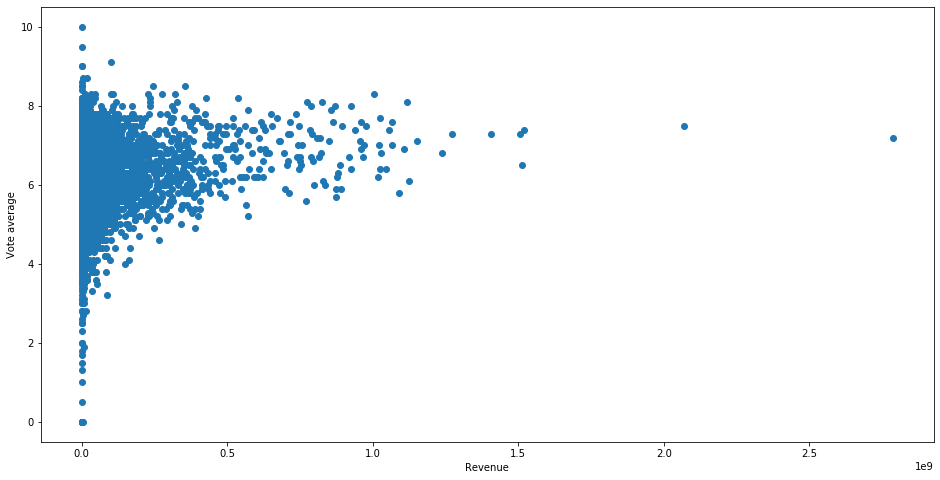

In [6]:
plt.figure(figsize=(16,8))
plt.scatter(feature.revenue, target.vote_average)
plt.xlabel("Revenue")
plt.ylabel("Vote average")

## **PART 1: Preprocessing**


In [7]:
feature.info() #test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31805 entries, 0 to 31804
Data columns (total 20 columns):
belongs_to_collection    0 non-null float64
budget                   31805 non-null int64
genres                   31805 non-null object
homepage                 31805 non-null int64
id                       31805 non-null int64
original_language        31805 non-null object
overview                 31146 non-null object
popularity               31805 non-null float64
production_companies     31805 non-null object
production_countries     31805 non-null object
release_date             31747 non-null object
revenue                  5178 non-null float64
spoken_languages         31805 non-null object
status                   31746 non-null object
title                    31805 non-null object
video                    31805 non-null bool
vote_count               31805 non-null int64
num_countries            31805 non-null int64
num_companies            31805 non-null int64
Comedy  

### Data Cleaning:

**Irrelevant data:**
those that are not actually needed, and don’t fit under the context of the problem we’re trying to solve.

In [8]:
feature = feature.drop(['belongs_to_collection'], axis=1)
test = test.drop(['belongs_to_collection'], axis=1)

### Handling missing values

**CASE 1**
If the missing values in a column rarely happen and occur at random like "production_countries", "popularity" ,... then the easiest and most forward solution is to drop observations (rows) that have missing values. If most of the column’s values are missing, and occur at random, then a typical decision is to drop the whole column.

In [9]:
feature.isnull().sum().sort_values(ascending = False)

revenue                 26627
overview                  659
status                     59
release_date               58
production_companies        0
genres                      0
homepage                    0
id                          0
original_language           0
popularity                  0
Comedy                      0
production_countries        0
num_companies               0
spoken_languages            0
title                       0
video                       0
vote_count                  0
num_countries               0
budget                      0
dtype: int64

In [10]:
test.isnull().sum().sort_values(ascending = False)

revenue                 11403
overview                  294
release_date               26
status                     22
production_companies        0
genres                      0
homepage                    0
id                          0
original_language           0
popularity                  0
Comedy                      0
production_countries        0
num_companies               0
spoken_languages            0
title                       0
video                       0
vote_count                  0
num_countries               0
budget                      0
dtype: int64

In [11]:
test['release_date']

0        2014-10-01
1        2016-12-17
2        1933-05-20
3        2009-01-09
4        2002-04-19
            ...    
13626    1974-10-02
13627    2009-01-01
13628    1945-04-07
13629    1975-12-25
13630    2014-05-30
Name: release_date, Length: 13631, dtype: object

In [12]:
#Percentage of missing values in "belongs_to_collection"
missing_value= feature["revenue"].isnull().sum()
print(f'The percentage of missing values in "revenue" is {round((missing_value/feature.shape[0]) * 100)} ')# round the value


The percentage of missing values in "revenue" is 84.0 


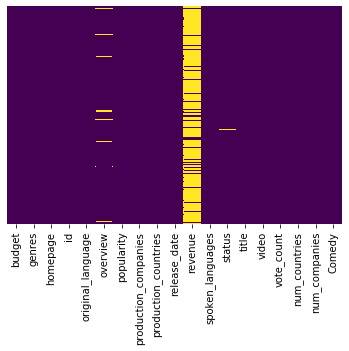

In [13]:
#Visualize the missing value
sns.heatmap(feature.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

**CASE 2**
Imputation means calculate the missing value based on other observations by using statistical values like mean, median.


In [14]:
feature['revenue'] = feature['revenue'].fillna(feature['revenue'].mean())
test['revenue'] = test['revenue'].fillna(feature['revenue'].mean())

In [15]:
feature['genres'] = feature['genres'].replace([], np.nan)
test['genres'] = test['genres'].replace([], np.nan)
#it can be done the same for the other features

## Feature engineering

Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models. 

Can you turn some of the features into things that the algorithm can understand?

In [16]:
#converted into number of genres
feature['len_genres'] = feature['genres'].apply(lambda x: len(x))
test['len_genres'] = test['genres'].apply(lambda x: len(x))

In [17]:
#
#
# TODO: You are now ready to add your own features or to modify the existing ones 
#
#









### Select features that will be used to train the model

In [18]:
selected_columns = ['len_genres','revenue','popularity']

### Split data randomly to the train and validation

In [19]:
X_train, X_valid, Y_train, y_valid = train_test_split(feature[selected_columns], target,
                                                      test_size=0.25, random_state=42)

## Training the model

### Regression problem: what is the average rate of each movie?

Is it possible to predict the average vote of coming movies (unseen data)?

To model the problem, we are going to use a Random Forest regression model.

In [20]:
# Do not hesitate to tweak those parameters: find the good tradeoff between underfitting and overfitting
#
#
#
RF = RandomForestRegressor(bootstrap=True, #  method for sampling data points (with or without replacement)                
                           max_depth=None, #  max number of levels in each decision tree
                           max_features='auto', #  max number of features considered for splitting a node
                           min_samples_leaf=1,  #  min number of data points allowed in a leaf node
                           min_samples_split=2, #  min number of data points placed in a node before the node is split
                           n_estimators=10 # number of trees in the foreset
                           )       

In [21]:
#Build a forest of trees from the training set
RF.fit(X_train,Y_train['vote_average']) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [22]:
prediction =  RF.predict(X_valid)

In [23]:
print('Root Mean Square Error:', np.round(sqrt(mean_squared_error(y_valid['vote_average'], prediction)),3))

Root Mean Square Error: 1.828


## Congratulations  !
 
You have now created a machine learning regression model using sklearn.

### Please save and submit your results:

In [24]:
submission_prediction = RF.predict(test[selected_columns])

In [25]:
submission = pd.DataFrame({
        "id": test.id,
        "predictions": np.round(submission_prediction, 3) 
})
submission.to_csv(team_name +'.csv', index=False)


### Please submit your predictions file (team_name +'.csv' located in your working directory) to the following url:

https://drive.google.com/drive/folders/1-doveGLiaPDGpAIzDM_JQ90TUXgZ5nX7?usp=sharing

## Appendix

### Are there certain words considered more worthy of a title or overviews?
Some features are text based like "title" and "overview". Word cloud (text clouds or tag clouds) helps to highlight important textual data points. The more a specific word appears in a source of textual data, the bigger and bolder it appears in the word cloud.
The only required argument for a WordCloud object is the text, while all others are optional.


In [26]:
# convert type of the "title" and "overview" features from object to string. It should be
# considered that values in a particular column must be of a particular datatype, 
#e.g., boolean, numeric, date, etc.

text['title'] = text['title'].astype('str')
text['overview'] = text['overview'].astype('str')


In [27]:
#create a corpus of words
title_corpus = ' '.join(text['title'])
overview_corpus = ' '.join(text['overview'])

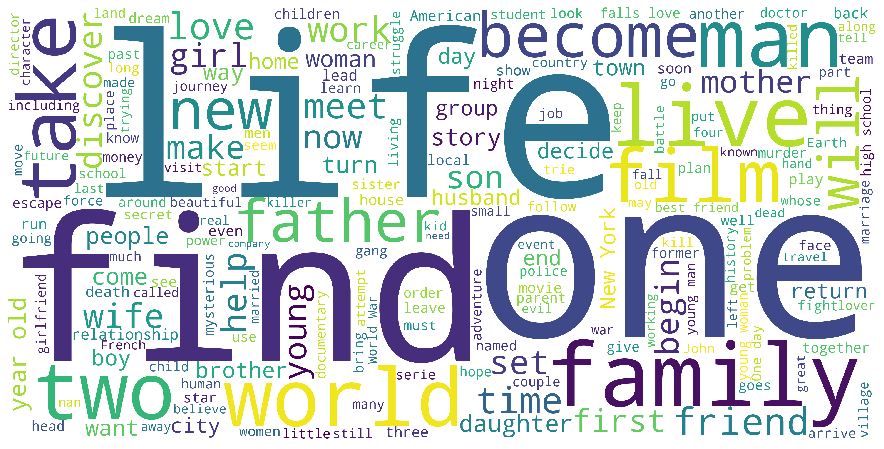

In [28]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

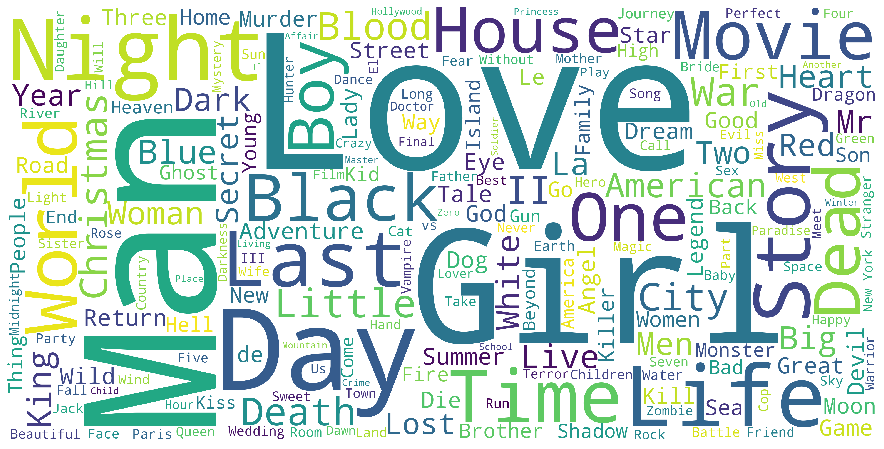

In [29]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()